In [161]:
from pyforest import *

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.svm import SVC

from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

sns.set()

<IPython.core.display.Javascript object>

In [162]:
sns.set(style="darkgrid")

<IPython.core.display.Javascript object>

In [163]:
df= pd.read_csv(r"train_ctrUa4K.csv")

df.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [164]:
df["total_income"]= df.ApplicantIncome + df.CoapplicantIncome

In [165]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [166]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
total_income         float64
dtype: object

In [167]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
total_income          0
dtype: int64

In [168]:
df["Gender"]= df.Gender.fillna(df.Gender.mode()[0])

df["Married"]= df.Married.fillna(df.Married.mode()[0])

df["Dependents"]= df.Dependents.fillna(df.Dependents.mode()[0])

df["Self_Employed"]= df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [169]:
df["LoanAmount"]= df.LoanAmount.fillna(df.LoanAmount.mean())

df["Loan_Amount_Term"]= df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

df["Credit_History"]= df.Credit_History.fillna(df.Credit_History.mean())

In [170]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
dtype: int64

In [171]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [172]:
df.Credit_History.value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

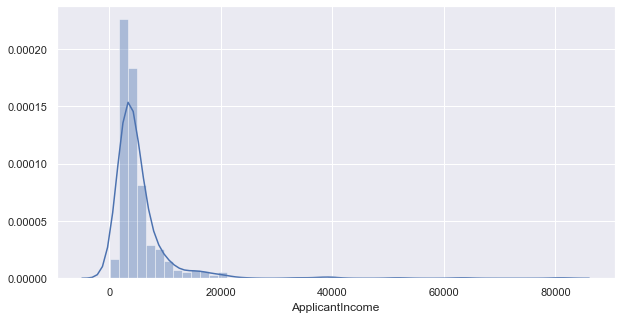

In [173]:
plt.figure(figsize=(10,5))
sns.distplot(df.ApplicantIncome)

<IPython.core.display.Javascript object>

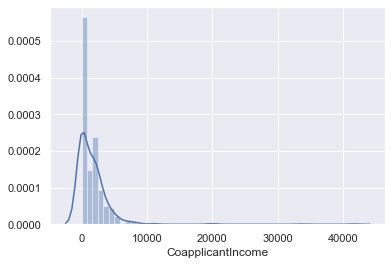

In [174]:
sns.distplot(df.CoapplicantIncome)

<IPython.core.display.Javascript object>

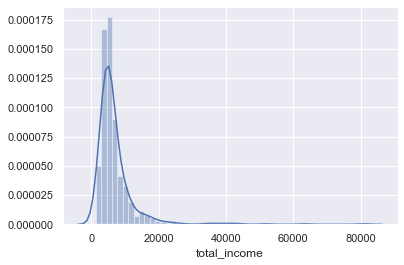

In [175]:
sns.distplot(df.total_income)

<IPython.core.display.Javascript object>

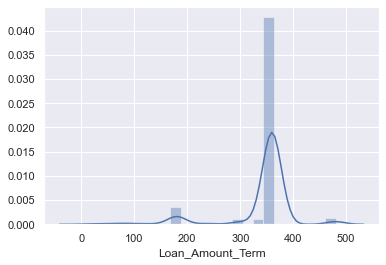

In [176]:
sns.distplot(df.Loan_Amount_Term)

<IPython.core.display.Javascript object>

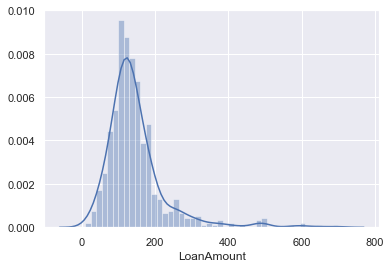

In [177]:
sns.distplot(df.LoanAmount)

In [178]:
from scipy import stats

In [179]:
df["ApplicantIncome"]= np.log(df["ApplicantIncome"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

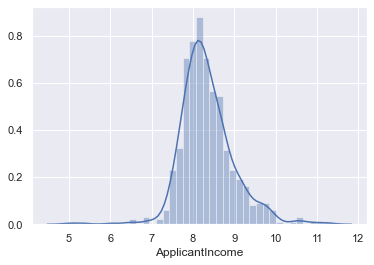

In [180]:
sns.distplot(df.ApplicantIncome)

In [181]:
df["CoapplicantIncome"]= np.log(df["CoapplicantIncome"])

<IPython.core.display.Javascript object>

In [182]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,141.000000,360.0,1.0,Urban,Y,6000.0


In [183]:
df["total_income"]= np.log(df["total_income"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

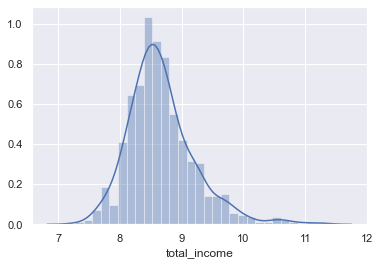

In [184]:
sns.distplot(df.total_income)

In [185]:
df["LoanAmount"]= np.log(df["LoanAmount"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

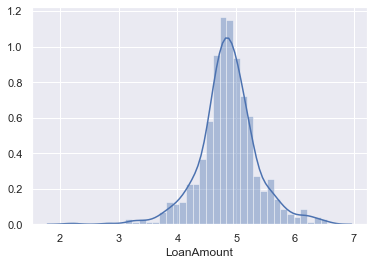

In [186]:
sns.distplot(df.LoanAmount)

In [187]:
df["Loan_Amount_Term"]= np.log(df["Loan_Amount_Term"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

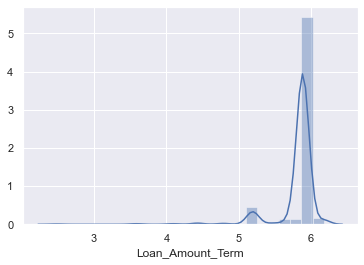

In [188]:
sns.distplot(df.Loan_Amount_Term)

<IPython.core.display.Javascript object>

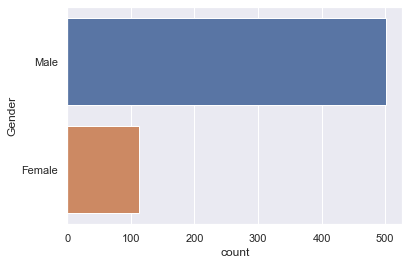

In [189]:
sns.countplot(y="Gender", data=df)

<IPython.core.display.Javascript object>

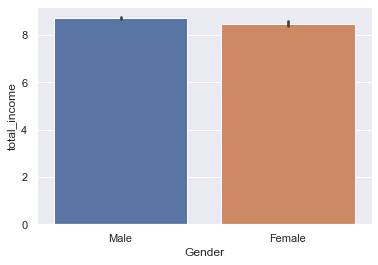

In [190]:
sns.barplot(x="Gender", y= "total_income", data=df)

In [191]:
df.Loan_Status.replace(to_replace =["Y"],  
                            value =1, inplace=True)

In [192]:
df.Loan_Status.replace(to_replace =["N"],  
                            value =0, inplace=True)

In [193]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,1,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,1,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,1,8.505323
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,1,8.699515


In [194]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
total_income         float64
dtype: object

In [195]:
corr = df.corr(method='pearson')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

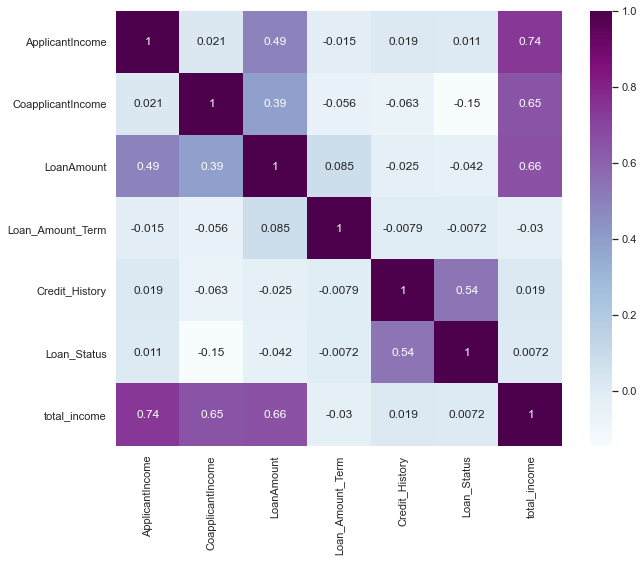

In [196]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap="BuPu")

In [234]:
df["Loan_Status"]= df.Loan_Status.astype("int")

In [198]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
total_income         float64
dtype: object

In [199]:
gender_loan_crosstab= pd.crosstab(df["Gender"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [200]:
gender_loan_crosstab

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [201]:
married_loan_crosstab= pd.crosstab(df["Married"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [202]:
married_loan_crosstab

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [203]:
dependents_loan_crosstab= pd.crosstab(df["Dependents"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [204]:
dependents_loan_crosstab

Loan_Status,0,1,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


In [205]:
education_loan_crosstab= pd.crosstab(df["Education"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [206]:
education_loan_crosstab

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [207]:
self_Employed_loan_crosstab= pd.crosstab(df["Self_Employed"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [208]:
self_Employed_loan_crosstab

Loan_Status,0,1,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


In [209]:
property_Area_loan_crosstab= pd.crosstab(df["Property_Area"], df["Loan_Status"], margins=True)

<IPython.core.display.Javascript object>

In [210]:
property_Area_loan_crosstab

Loan_Status,0,1,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [211]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected= stats.chi2_contingency(crosstab_table)
    print("chisquare stat value: {}".format(stat))
    print("p value is: {}".format(p))
    alpha= 1.0 - confidence_interval
    if p <= alpha:
        print("dependent reject h0")
    else:
        print("independent accept h0")
    return expected

In [212]:
exp_table_1= check_categorical_dependency(gender_loan_crosstab,0.95)

chisquare stat value: 0.19864165509874285
p value is: 0.9953824259938442
independent accept h0


In [213]:
exp_table_2= check_categorical_dependency(married_loan_crosstab,0.95)

chisquare stat value: 5.1380701449230175
p value is: 0.27342175083638093
independent accept h0


In [214]:
exp_table_3= check_categorical_dependency(dependents_loan_crosstab,0.95)

chisquare stat value: 3.151399001232423
p value is: 0.9245000626763191
independent accept h0


In [215]:
exp_table_4= check_categorical_dependency(education_loan_crosstab,0.95)

chisquare stat value: 4.5288927351787684
p value is: 0.3391352834234793
independent accept h0


In [216]:
exp_table_5= check_categorical_dependency(self_Employed_loan_crosstab,0.95)

chisquare stat value: 0.008407648919431859
p value is: 0.9999911886544866
independent accept h0


In [217]:
exp_table_6= check_categorical_dependency(property_Area_loan_crosstab,0.95)

chisquare stat value: 12.297623130485677
p value is: 0.055649170558480544
independent accept h0


In [218]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,1,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,1,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,1,8.505323
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,1,8.699515


In [219]:
df= df.drop(["Loan_ID","Gender",
            "Married","Dependents","Education","Self_Employed","CoapplicantIncome"], axis=1)

In [220]:
df.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,8.674026,4.986426,5.886104,1.0,Urban,1,8.674026
1,8.430109,4.852030,5.886104,1.0,Rural,0,8.714568
2,8.006368,4.189655,5.886104,1.0,Urban,1,8.006368
3,7.856707,4.787492,5.886104,1.0,Urban,1,8.505323
4,8.699515,4.948760,5.886104,1.0,Urban,1,8.699515


In [221]:
from sklearn.preprocessing import LabelEncoder

In [222]:
lr= LabelEncoder()

In [223]:
df["Property_Area"]= lr.fit_transform(df.Property_Area)

In [224]:
df.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,8.674026,4.986426,5.886104,1.0,2,1,8.674026
1,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,8.699515,4.948760,5.886104,1.0,2,1,8.699515


In [235]:
X= df.drop("Loan_Status", axis=1)

In [236]:
y= df.Loan_Status

In [237]:
X.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,8.674026,4.986426,5.886104,1.0,2,8.674026
1,8.430109,4.852030,5.886104,1.0,0,8.714568
2,8.006368,4.189655,5.886104,1.0,2,8.006368
3,7.856707,4.787492,5.886104,1.0,2,8.505323
4,8.699515,4.948760,5.886104,1.0,2,8.699515


In [238]:
df["Loan_Status"]= df.Loan_Status.astype("int")

In [239]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [240]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.35, random_state=42)

In [241]:
X_train.shape, y_train.shape

((399, 6), (399,))

In [249]:
X_train

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
540,8.435549,4.941642,5.192957,1.0,1,8.916372
298,8.517193,5.017280,6.173786,1.0,0,8.928110
149,8.488794,4.828314,5.886104,1.0,1,8.646466
124,8.366370,5.267858,5.886104,1.0,0,8.750525
442,8.456806,4.997212,5.886104,1.0,1,8.809863
...,...,...,...,...,...,...
71,7.536364,4.574711,5.886104,1.0,1,8.229511
106,9.342859,5.416100,5.886104,1.0,2,9.436918
270,8.082402,3.401197,5.886104,1.0,2,8.082402
435,9.215029,4.986426,5.480639,1.0,1,9.215029


In [286]:
model= CatBoostClassifier(iterations=50, learning_rate=0.5, eval_metric="Accuracy")

In [287]:
model.fit(X_train,y_train, eval_set=(X_test,y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8195489	test: 0.7860465	best: 0.7860465 (0)	total: 3.74ms	remaining: 183ms
1:	learn: 0.8170426	test: 0.7953488	best: 0.7953488 (1)	total: 6.97ms	remaining: 167ms
2:	learn: 0.8220551	test: 0.8000000	best: 0.8000000 (2)	total: 9.66ms	remaining: 151ms
3:	learn: 0.8195489	test: 0.7953488	best: 0.8000000 (2)	total: 12.1ms	remaining: 140ms
4:	learn: 0.8195489	test: 0.7906977	best: 0.8000000 (2)	total: 14.6ms	remaining: 131ms
5:	learn: 0.8220551	test: 0.7906977	best: 0.8000000 (2)	total: 17.2ms	remaining: 126ms
6:	learn: 0.8195489	test: 0.7953488	best: 0.8000000 (2)	total: 19.7ms	remaining: 121ms
7:	learn: 0.8245614	test: 0.7953488	best: 0.8000000 (2)	total: 22.1ms	remaining: 116ms
8:	learn: 0.8245614	test: 0.7953488	best: 0.8000000 (2)	total: 24.6ms	remaining: 112ms
9:	learn: 0.8320802	test: 0.7953488	best: 0.8000000 (2)	total: 27ms	remaining: 108ms
10:	learn: 0.8295739	test: 0.7953488	best: 0.8000000 (2)	total: 29.4ms	remaining: 104ms
11:	learn: 0.8320802	test: 0.7953488	best: 0

In [288]:
y_pred= model.predict(X_test)

In [289]:
model.score(X_test,y_test), model.score(X_train,y_train)

(0.8, 0.8220551378446115)

In [290]:
test= pd.read_csv("test_lAUu6dG.csv")

test.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [291]:
test= test.drop(["Loan_ID","Gender","Married","Dependents","Education","Self_Employed"], axis=1)

In [292]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,5720,0,110.0,360.0,1.0,Urban
1,3076,1500,126.0,360.0,1.0,Urban
2,5000,1800,208.0,360.0,1.0,Urban
3,2340,2546,100.0,360.0,NaN,Urban
4,3276,0,78.0,360.0,1.0,Urban


In [293]:
test["total_income"]= test.ApplicantIncome + test.CoapplicantIncome

In [294]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,5720,0,110.0,360.0,1.0,Urban,5720
1,3076,1500,126.0,360.0,1.0,Urban,4576
2,5000,1800,208.0,360.0,1.0,Urban,6800
3,2340,2546,100.0,360.0,NaN,Urban,4886
4,3276,0,78.0,360.0,1.0,Urban,3276


In [295]:
test= test.drop("CoapplicantIncome", axis=1)

In [296]:
test.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,5720,110.0,360.0,1.0,Urban,5720
1,3076,126.0,360.0,1.0,Urban,4576
2,5000,208.0,360.0,1.0,Urban,6800
3,2340,100.0,360.0,NaN,Urban,4886
4,3276,78.0,360.0,1.0,Urban,3276


In [297]:
test["LoanAmount"]= test.LoanAmount.fillna(test.LoanAmount.mean())

test["Loan_Amount_Term"]= test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())

test["Credit_History"]= test.Credit_History.fillna(test.Credit_History.mean())

In [298]:
test.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,5720,110.0,360.0,1.000000,Urban,5720
1,3076,126.0,360.0,1.000000,Urban,4576
2,5000,208.0,360.0,1.000000,Urban,6800
3,2340,100.0,360.0,0.825444,Urban,4886
4,3276,78.0,360.0,1.000000,Urban,3276


In [299]:
test.isna().sum()

ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
total_income        0
dtype: int64

In [300]:
test["ApplicantIncome"]= np.log(test.ApplicantIncome)
test["LoanAmount"]= np.log(test.LoanAmount)
test["total_income"]= np.log(test.total_income)
test["Loan_Amount_Term"]= np.log(test.Loan_Amount_Term)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [301]:
test.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,8.651724,4.700480,5.886104,1.000000,Urban,8.651724
1,8.031385,4.836282,5.886104,1.000000,Urban,8.428581
2,8.517193,5.337538,5.886104,1.000000,Urban,8.824678
3,7.757906,4.605170,5.886104,0.825444,Urban,8.494129
4,8.094378,4.356709,5.886104,1.000000,Urban,8.094378


In [302]:
test["Property_Area"]= lr.transform(test.Property_Area)

In [303]:
test.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,8.651724,4.700480,5.886104,1.000000,2,8.651724
1,8.031385,4.836282,5.886104,1.000000,2,8.428581
2,8.517193,5.337538,5.886104,1.000000,2,8.824678
3,7.757906,4.605170,5.886104,0.825444,2,8.494129
4,8.094378,4.356709,5.886104,1.000000,2,8.094378


In [304]:
test_pred= model.predict(test)

In [305]:
model.score(test,test_pred)

1.0

In [306]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [307]:
data= pd.DataFrame({"Loan_Status":test_pred})

<IPython.core.display.Javascript object>

In [308]:
test_new= pd.read_csv("test_lAUu6dG.csv")["Loan_ID"]
test_new.head()

<IPython.core.display.Javascript object>

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [309]:
new_test= pd.concat([test_new,data], axis=1)

<IPython.core.display.Javascript object>

In [310]:
new_test.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [311]:
new_test.to_csv("submission.csv")